In [8]:
%pip install weaviate-client

Note: you may need to restart the kernel to use updated packages.


1. Start the Weaviate instance: `docker compose up`
2. Run code below

In [9]:
import pickle, json, os, IPython, base64
import weaviate.classes as wvc
from weaviate.classes.config import Configure

In [10]:
#Connect to the locally launched instance of Weaviate

client = weaviate.connect_to_local()

print(f"Client created? {client.is_ready()}")

NameError: name 'weaviate' is not defined

In [19]:
# client.collections?

In [33]:
#Make sure that we don't have a class already created

if client.collections.exists("ClipExample"):
    client.collections.delete("ClipExample")
    print("Deleted existing ClipExample collection")

Deleted existing ClipExample collection


In [34]:
#Create a class object that uses a multi2vec module
#A multi2vec module understands multiple types of data - there are 

from weaviate.classes.config import Property, DataType

client.collections.create(
    name="ClipExample",
    vectorizer_config=Configure.Vectorizer.multi2vec_clip(
        image_fields=["image"]
    ),
    properties=[
        Property(name="image", data_type=DataType.BLOB),
        Property(name="filename", data_type=DataType.TEXT)
    ]
)

print("Schema class created")

Schema class created


In [35]:
#Add images to our created class

collection = client.collections.get("ClipExample")

# Filter for image files only
image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp']
image_files = [f for f in os.listdir("Images/") if os.path.splitext(f)[1].lower() in image_extensions]

for img in image_files:
    try:
        with open(f"Images/{img}", "rb") as file:
            image_data = base64.b64encode(file.read()).decode('utf-8')
        
        collection.data.insert(
            properties={
                "image": image_data,
                "filename": img
            }
        )
        print(f"Added: {img}")
    except Exception as e:
        print(f"Error adding {img}: {e}")

print(f"\nTotal: Added {len(image_files)} images to the collection")

Added: n03425413_652.JPEG
Added: ILSVRC2012_val_00011691.JPEG
Added: n02979186_1632.JPEG
Added: n02102040_451.JPEG
Added: n01440764_921.JPEG
Added: ILSVRC2012_val_00002210.JPEG
Added: ILSVRC2012_val_00022792.JPEG
Added: n02102040_451.JPEG
Added: n01440764_921.JPEG
Added: ILSVRC2012_val_00002210.JPEG
Added: ILSVRC2012_val_00022792.JPEG
Added: n02102040_142.JPEG
Added: n01440764_622.JPEG
Added: n03000684_1031.JPEG
Added: n02102040_142.JPEG
Added: n01440764_622.JPEG
Added: n03000684_1031.JPEG
Added: n03000684_400.JPEG
Added: ILSVRC2012_val_00017700.JPEG
Added: n03000684_900.JPEG
Added: n03445777_501.JPEG
Added: n03000684_400.JPEG
Added: ILSVRC2012_val_00017700.JPEG
Added: n03000684_900.JPEG
Added: n03445777_501.JPEG
Added: n03417042_1031.JPEG
Added: n02979186_510.JPEG
Added: ILSVRC2012_val_00027110.JPEG
Added: ILSVRC2012_val_00034021.JPEG
Added: n03417042_1031.JPEG
Added: n02979186_510.JPEG
Added: ILSVRC2012_val_00027110.JPEG
Added: ILSVRC2012_val_00034021.JPEG
Added: n03000684_1100.JPEG


In [36]:
#Lets search for images of "dogs"

collection = client.collections.get("ClipExample")

res = collection.query.near_text(
    query="dogs",
    limit=3
)

print(json.dumps([{"uuid": str(o.uuid), "properties": o.properties} for o in res.objects], indent=2))

[
  {
    "uuid": "f25e46b9-6bea-4967-9a38-bac8f10f829a",
    "properties": {
      "filename": "n02102040_372.JPEG"
    }
  },
  {
    "uuid": "85350074-cc48-40dc-87f4-52c2d19a56b1",
    "properties": {
      "filename": "n02102040_132.JPEG"
    }
  },
  {
    "uuid": "e5af6e27-4200-496b-b905-b3238a1779ce",
    "properties": {
      "filename": "n02102040_421.JPEG"
    }
  }
]


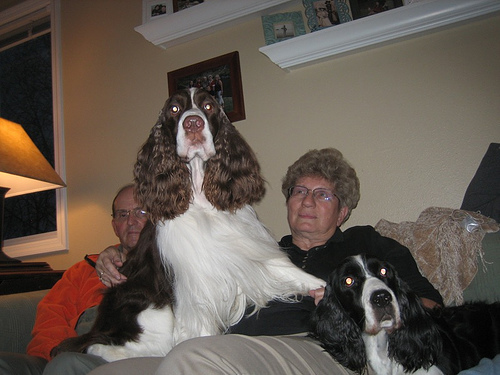

In [37]:
#Lets visualize the images that came back
IPython.display.Image(filename='Images/n02102040_372.JPEG') 

In [1]:
#Lets search for images using a query image

collection = client.collections.get("ClipExample")

# Pick an image to use as the query
# query_image_path = "Images/n02102040_372.JPEG"
query_image_path = "TestImages/n01440764_20592.JPEG"

with open(query_image_path, "rb") as file:
    query_image = base64.b64encode(file.read()).decode('utf-8')

imres = collection.query.near_image(
    near_image=query_image,
    limit=3
)

print(json.dumps([{"uuid": str(o.uuid), "filename": o.properties.get("filename")} for o in imres.objects], indent=2))

NameError: name 'client' is not defined

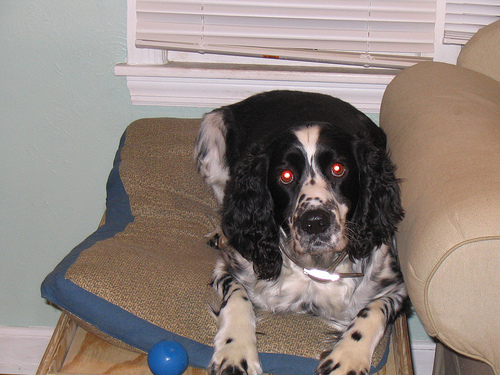

In [40]:
#Lets visualize the images that came back
IPython.display.Image(filename='Images/ILSVRC2012_val_00016582.JPEG') 